### Prerequisites
1. Make sure to have run prompt_models.py to get the model_responses.json
2. Import the stuff below

In [25]:
import contextlib
import matplotlib.pyplot as plt

from parse_and_test_whole import parse_and_test_whole
from parse_and_test_diff import parse_and_test_diff
from parse_and_test_udiff import parse_and_test_udiff

### Get results

In [26]:
# Get results
with contextlib.redirect_stdout(None): # To avoid seeing print statements from the functions
    results_whole = parse_and_test_whole()
    results_diff = parse_and_test_diff()
    results_udiff = parse_and_test_udiff()

Overall Accuracy:
Whole File Edits: 27/30 = 90.00%
Diff Edits: 20/30 = 66.67%
UDiff Edits: 8/30 = 26.67%


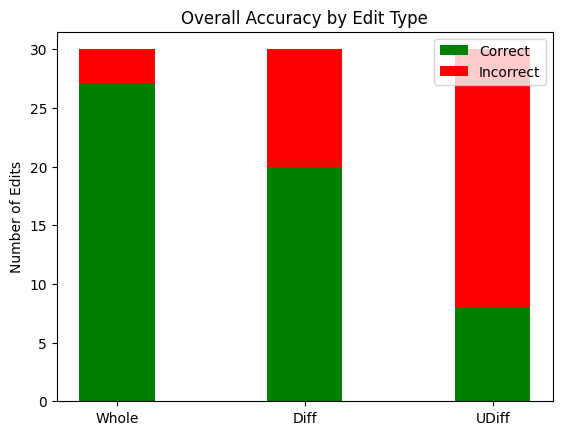

In [32]:
# Calculate overall accuracies for edit types
total_whole_correct = results_whole['logic_test_passed'] + results_whole['class_extension_test_passed'] + results_whole['crash_test_passed']
total_whole_failed = results_whole['logic_test_failed'] + results_whole['class_extension_test_failed'] + results_whole['crash_test_failed']

total_diff_correct = results_diff['logic_test_passed'] + results_diff['class_extension_test_passed'] + results_diff['crash_test_passed']
total_diff_incorrect = results_diff['logic_test_failed'] + results_diff['class_extension_test_failed'] + results_diff['crash_test_failed']

total_udiff_correct = results_udiff['logic_test_passed'] + results_udiff['class_extension_test_passed'] + results_udiff['crash_test_passed']
total_udiff_incorrect = results_udiff['logic_test_failed'] + results_udiff['class_extension_test_failed'] + results_udiff['crash_test_failed']

print("Overall Accuracy:")
print(f"Whole File Edits: {total_whole_correct}/{total_whole_correct + total_whole_failed} = {total_whole_correct / (total_whole_correct + total_whole_failed):.2%}")
print(f"Diff Edits: {total_diff_correct}/{total_diff_correct + total_diff_incorrect} = {total_diff_correct / (total_diff_correct + total_diff_incorrect):.2%}")
print(f"UDiff Edits: {total_udiff_correct}/{total_udiff_correct + total_udiff_incorrect} = {total_udiff_correct / (total_udiff_correct + total_udiff_incorrect):.2%}")

# Plot the results
labels = ['Whole', 'Diff', 'UDiff']
correct_counts = [total_whole_correct, total_diff_correct, total_udiff_correct]
incorrect_counts = [total_whole_failed, total_diff_incorrect, total_udiff_incorrect]
x = range(len(labels))
plt.bar(x, correct_counts, width=0.4, label='Correct', color='g', align='center')	
plt.bar(x, incorrect_counts, width=0.4, bottom=correct_counts, label='Incorrect', color='r', align='center')
plt.xticks(x, labels)
plt.ylabel('Number of Edits')
plt.title('Overall Accuracy by Edit Type')
plt.legend()
plt.show()


Model Accuracies:
x-ai/grok-4.1-fast:free: 8/9 = 88.89%
kwaipilot/kat-coder-pro:free: 7/9 = 77.78%
z-ai/glm-4.5-air:free: 4/9 = 44.44%
google/gemma-3-4b-it:free: 3/9 = 33.33%
google/gemma-3-12b-it:free: 5/9 = 55.56%
nvidia/nemotron-nano-12b-v2-vl:free: 3/9 = 33.33%
google/gemma-3-27b-it:free: 5/9 = 55.56%
meta-llama/llama-3.3-70b-instruct:free: 5/9 = 55.56%
openai/gpt-oss-20b:free: 6/9 = 66.67%
mistralai/mistral-small-3.1-24b-instruct:free: 9/9 = 100.00%


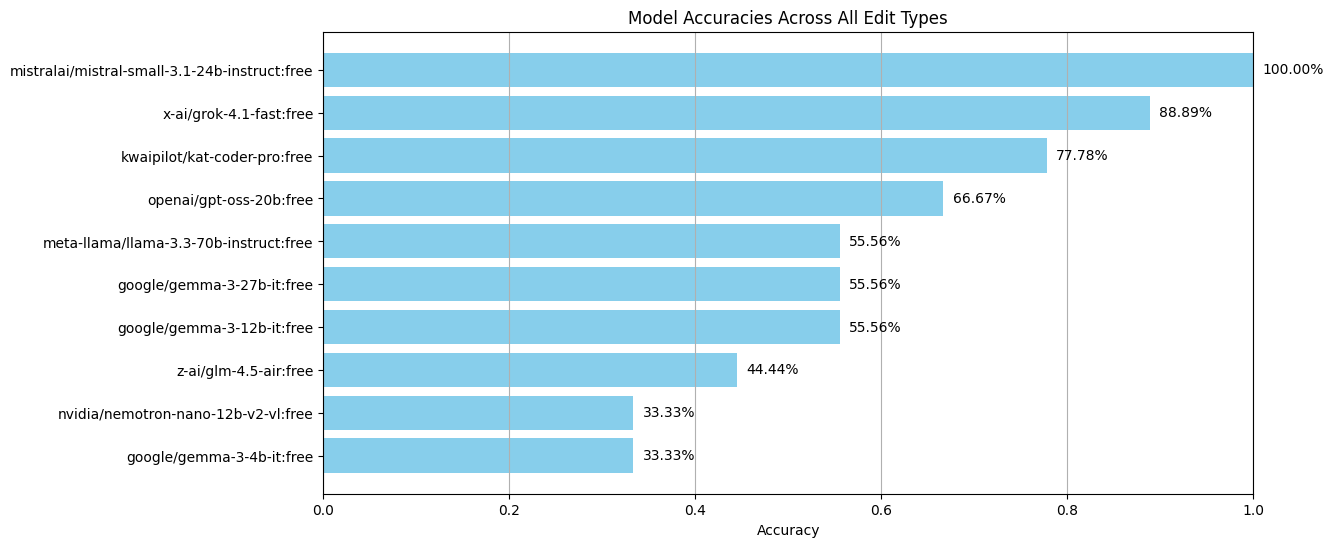

In [36]:
# Calculate overall accuracies for models
models = [
        "x-ai/grok-4.1-fast:free",
        "kwaipilot/kat-coder-pro:free",
        "z-ai/glm-4.5-air:free",
        "google/gemma-3-4b-it:free",
        "google/gemma-3-12b-it:free",
        "nvidia/nemotron-nano-12b-v2-vl:free",
        "google/gemma-3-27b-it:free",
        "meta-llama/llama-3.3-70b-instruct:free",
        "openai/gpt-oss-20b:free",
        "mistralai/mistral-small-3.1-24b-instruct:free"
    ]
models_accuracies = {model: {"passed": 0, "failed": 0} for model in models}
for model, stats in results_whole['model_stats'].items():
    models_accuracies[model]["passed"] += stats['Logic Test']['passed'] + stats['Crash Test']['passed'] + stats['Class Extension Test']['passed']
    models_accuracies[model]["failed"] += stats['Logic Test']['failed'] + stats['Crash Test']['failed'] + stats['Class Extension Test']['failed']

for model, stats in results_diff['model_stats'].items():
    
	models_accuracies[model]["passed"] += stats['Logic Test']['passed'] + stats['Crash Test']['passed'] + stats['Class Extension Test']['passed']
	models_accuracies[model]["failed"] += stats['Logic Test']['failed'] + stats['Crash Test']['failed'] + stats['Class Extension Test']['failed']
 
for model, stats in results_udiff['model_stats'].items():
	models_accuracies[model]["passed"] += stats['Logic Test']['passed'] + stats['Crash Test']['passed'] + stats['Class Extension Test']['passed']
	models_accuracies[model]["failed"] += stats['Logic Test']['failed'] + stats['Crash Test']['failed'] + stats['Class Extension Test']['failed']
 
print("\nModel Accuracies:")
for model, stats in models_accuracies.items():
	total = stats['passed'] + stats['failed']
	accuracy = stats['passed'] / total
	print(f"{model}: {stats['passed']}/{total} = {accuracy:.2%}")
 
# Plot model accuracies sorted by accuracy
plt.figure(figsize=(12, 6))
model_names = list(models_accuracies.keys())
accuracies = [stats['passed'] / (stats['passed'] + stats['failed']) if (stats['passed'] + stats['failed']) > 0 else 0 for stats in models_accuracies.values()]
sorted_indices = sorted(range(len(accuracies)), key=lambda i: accuracies[i])
model_names = [model_names[i] for i in sorted_indices]
accuracies = [accuracies[i] for i in sorted_indices]
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies Across All Edit Types')

# Add percentages on the bars
for i, v in enumerate(accuracies):
    plt.text(v + 0.01, i, f"{v:.2%}", va='center')

plt.xlim(0, 1)
plt.grid(axis='x')
plt.show()
 